<a href="https://colab.research.google.com/github/DarshaPadmanban/24ADI003_24BAD017/blob/main/Exercise_5(SC_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Sample:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2   

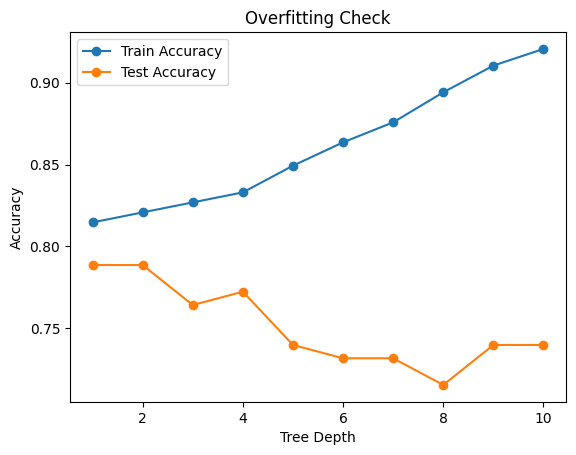


Best Depth: 1

--- Decision Tree Performance ---
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



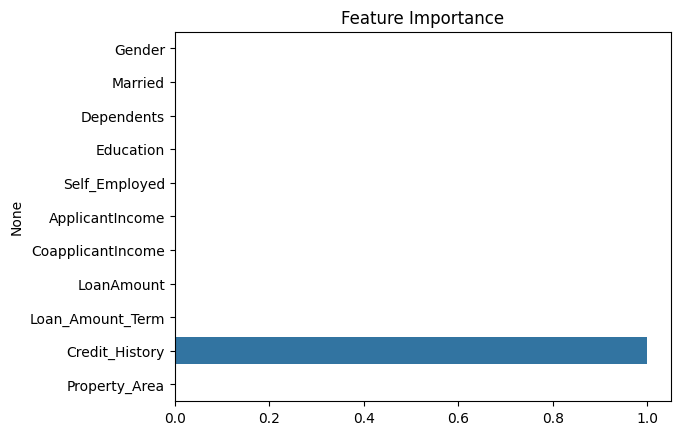


Training Accuracy: 0.814663951120163
Testing Accuracy: 0.7886178861788617


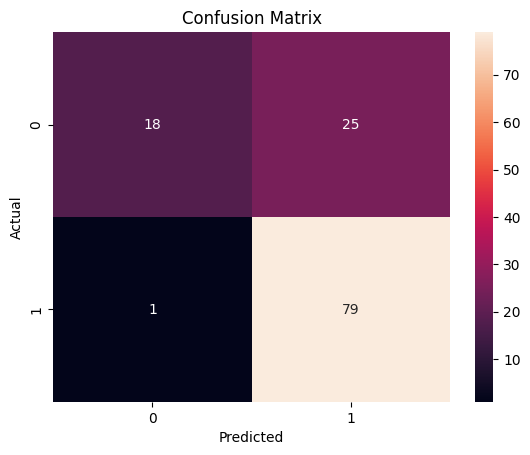

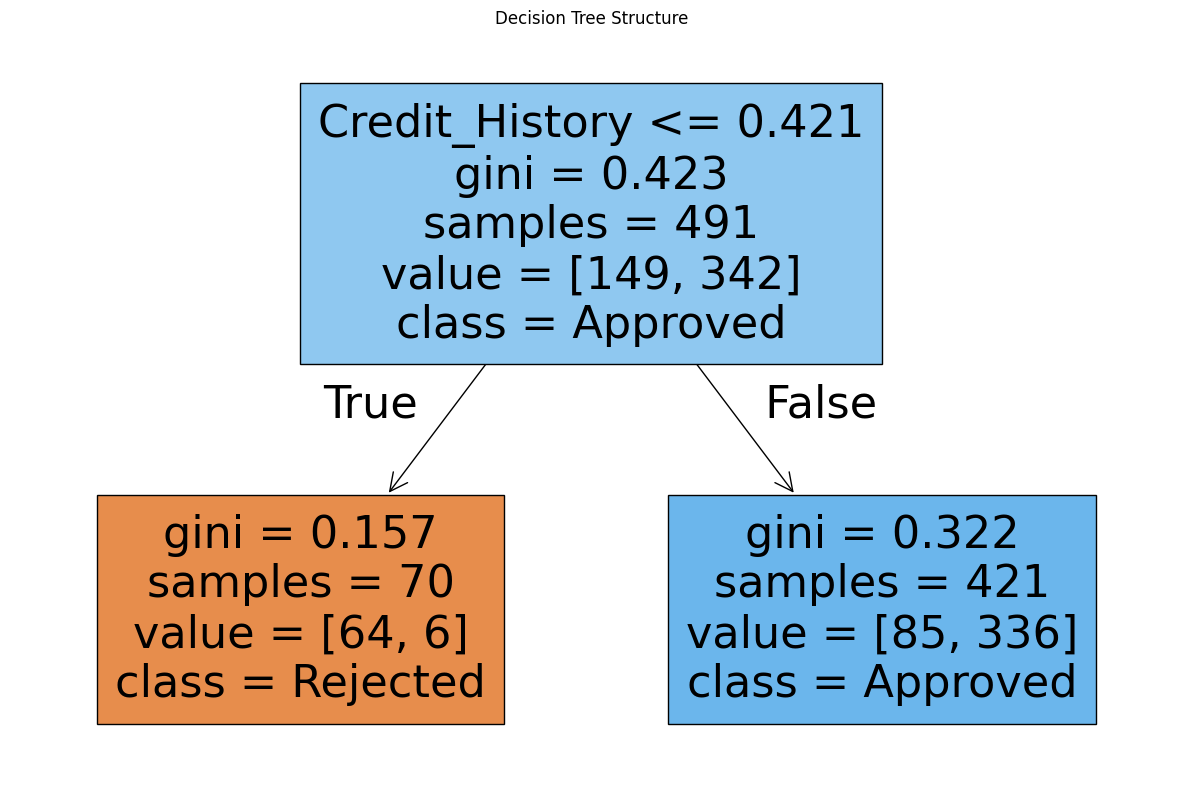

In [3]:
# ==========================================
# LOAN APPROVAL PREDICTION USING DECISION TREE
# ==========================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ==========================================
# 2️⃣ Load Dataset
# ==========================================

# 🔹 Use your actual uploaded filename
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

print("Dataset Sample:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# ==========================================
# 3️⃣ Preprocessing
# ==========================================

# Drop Loan_ID if exists
if "Loan_ID" in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables safely
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# ==========================================
# 4️⃣ Define Features & Target
# ==========================================

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# ==========================================
# 5️⃣ Train-Test Split
# ==========================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
# 6️⃣ Depth Experiment (Overfitting Check)
# ==========================================

depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    temp_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    temp_model.fit(X_train, y_train)
    train_acc.append(temp_model.score(X_train, y_train))
    test_acc.append(temp_model.score(X_test, y_test))

# Plot Accuracy vs Depth
plt.figure()
plt.plot(depths, train_acc, marker="o", label="Train Accuracy")
plt.plot(depths, test_acc, marker="o", label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Check")
plt.legend()
plt.show()

# Best Depth
best_depth = depths[np.argmax(test_acc)]
print("\nBest Depth:", best_depth)

# Final Model
model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model.fit(X_train, y_train)

# ==========================================
# 7️⃣ Predictions
# ==========================================

y_pred = model.predict(X_test)

# ==========================================
# 8️⃣ Evaluation
# ==========================================

print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ==========================================
# 9️⃣ Feature Importance
# ==========================================

importance = model.feature_importances_
features = X.columns

plt.figure()
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

# ==========================================
# 🔟 Overfitting Check
# ==========================================

print("\nTraining Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

# ==========================================
# Confusion Matrix
# ==========================================

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==========================================
# Tree Structure
# ==========================================

plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=features,
          class_names=["Rejected", "Approved"],
          filled=True)
plt.title("Decision Tree Structure")
plt.show()